In [10]:
import matplotlib.pyplot as plt
# from PIL import Image
import os
import pandas as pd
import numpy as np

import albumentations as A
from albumentations.pytorch import ToTensorV2


In [2]:
def get_transforms(img_w=256, img_h=256):
    train_transform = A.Compose(
        [
        A.Resize(height=img_h, width=img_w),
            A.Rotate(limit=35, p=1.0),
            A.HorizontalFlip(p=0.3),
            # A.Normalize(
            #     mean=[0.0, 0.0, 0.0],
            #     std=[1.0, 1.0, 1.0],
            #     max_pixel_value=255.0,
            # ),
            ToTensorV2(),
        ],
    )

    val_transforms = A.Compose(
        [
            A.Resize(height=img_h, width=img_w),
            # A.Normalize(
            #     mean=[0.0, 0.0, 0.0],
            #     std=[1.0, 1.0, 1.0],
            #     max_pixel_value=255.0,
            # ),
            ToTensorV2(),
        ],
    )

    return train_transform, val_transforms

In [3]:
class CT_Dataset:
    def __in__ (self, csv_dir = "./csv/", image_set="train", transforms= None):
        self.transforms = transforms
        self.df = pd.read_csv(os.path.join(csv_dir, image_set + '.csv'))

    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        img_data = self.df.iloc[idx]
        img = plt.imread(img_data["filepath"])
        # fixing scale of masks
        liver_mask = plt.imread(img_data["liver_maskpath"])*255
        tumor_mask = plt.imread(img_data["tumor_maskpath"])*255

        if self.transforms is not None:
            transformed = self.transforms(image=img, masks=[liver_mask, tumor_mask])
            img = transformed["image"]
            liver_mask = transformed["masks"][0]
            tumor_mask = transformed["masks"][1]
        tumor_mask = tumor_mask*2 # tumor class is 2
        return img, liver_mask, tumor_mask



## Let's play

In [4]:
df = pd.read_csv("./csv/train.csv")
df.head()

,filepath,liver_maskpath,tumor_maskpath,study_number,instance_number,liver_mask_empty,tumor_mask_empty
0,/apps/local/shared/HC701/assessment/assignment...,/apps/local/shared/HC701/assessment/assignment...,/apps/local/shared/HC701/assessment/assignment...,2,0,False,False
1,/apps/local/shared/HC701/assessment/assignment...,/apps/local/shared/HC701/assessment/assignment...,/apps/local/shared/HC701/assessment/assignment...,2,0,False,False
2,/apps/local/shared/HC701/assessment/assignment...,/apps/local/shared/HC701/assessment/assignment...,/apps/local/shared/HC701/assessment/assignment...,2,0,False,False
3,/apps/local/shared/HC701/assessment/assignment...,/apps/local/shared/HC701/assessment/assignment...,/apps/local/shared/HC701/assessment/assignment...,2,1,False,False
4,/apps/local/shared/HC701/assessment/assignment...,/apps/local/shared/HC701/assessment/assignment...,/apps/local/shared/HC701/assessment/assignment...,2,1,False,False


In [5]:
for i in range(len(df[df['study_number'] == 2])):
    img_data = df[df['study_number'] == 2].iloc[i]
    tumor_mask = plt.imread(img_data["tumor_maskpath"])
    if  tumor_mask.sum()>2:
        liver_mask = plt.imread(img_data["liver_maskpath"])
        img = plt.imread(img_data["filepath"])
        print("liver")
        break

liver


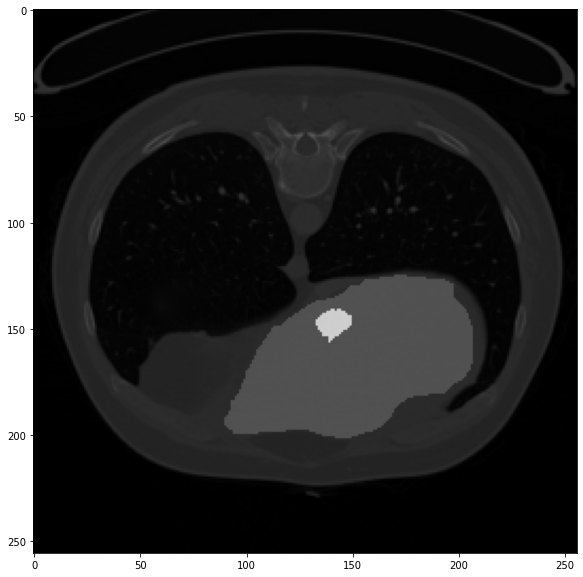

In [6]:
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.imshow(liver_mask*255, alpha=0.3)
plt.imshow(tumor_mask*255, alpha=0.5)


In [13]:
combined_mask  = np.where(liver_mask*255==1, 1, 0)
combined_mask  = np.where(tumor_mask*255==1, 2, combined_mask)

In [27]:
combined_mask[combined_mask==2]
np.unique(combined_mask)
combined_mask.shape

(256, 256, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


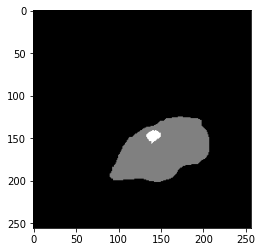

In [28]:
plt.imshow(combined_mask*128)

error: OpenCV(4.7.0) /io/opencv/modules/highgui/src/window.cpp:1272: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'
